# Exercise no. 3
---

## Missing Values & DateTime format

<div>
<img src="https://github.com/Razelbaz1/exercises-package/blob/master/pics/39935Missing%20Values%201.png?raw=true"/>
</div>

1. [Quick recap](#section1)
2. [.isnull()](#section2)
3. [.fillna()](#section3)
4. [interpolate() ](#section4)
5. [dropna()](#section5)
5. [A note on slicing - copy()](#section6)


<a id='section1'></a>
### Quick recap

`null` / `na` - no value

`NaN` - **N**ot **a** **N**umber - the value is missing. This value will be ignored in calculations such as `.mean()`

`isnull()` ?

---
>A summary of the functions so far:
>
>* `to_frame(name= ['column_name'])` - converts a series to a dataframe
>* `.isnull()` - display rows that contain missing values
>* `.notnull()` - display rows that don't contain missing values
>* `.dropna()` - Remove rows with missing values according to parameters:
    * `.dropna()` (default) - drops rows if at least one column has NaN
    * `.dropna(subset = ['column_name'])` - drop rows that contain missing values in the subset of column names
    * `.dropna(how='all')` - drops rows only if all of its columns have NaNs
    * `.dropna(thresh = k)` - k how many non-null values you want to keep (k=3 means the row should contain at least 3 non-null values)
    * `.dropna(axis=1)` - drop columns instead of rows
>

See documnetation [here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)




>
>* `.fillna()` - fill missing values according to parameters:
    * `.fillna('k')`  - with value k, create a new dataframe
    * `.fillna('k', inplace = True)` - with value k, into the existing dataframe
    * `.fillna(method='ffill')` - fill with first non-missing value that occurs before it 
    * `.fillna(method='bfill')` - fill with first non-missing value that occurs after it  
> * `interpolate` - fill using some interpolation technique
> * `replace(x,y)` - replace x with y
>
>* `.copy()` - creates a copy of the slice of the dataframe
>
>* `.copy(deep=False)` - updates to the original dataframe will show in the copy
>See documnetation:
>
>* [Missing data handling documentation](https://pandas-docs.github.io/pandas-docs-travis/reference/frame.html#missing-data-handling)
---

In [1]:
import pandas as pd
#df = pd.read_csv("weather_data.csv",parse_dates=['day'])

# or 
df = pd.read_csv("https://raw.githubusercontent.com/Razelbaz1/exercises-package/master/data/weather_data.csv",parse_dates=['day'])

type(df.day[0])
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


#### ` pd.read_csv ` function tells the Pandas library to attempt to parse the column with the name "day" in the CSV file as a date and time format.

In [2]:
df.set_index('day',inplace=True)
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


<a id='section2'></a>

## <font color="navy">.isnull()</font>


<font color="red">**How many values are missing**</font>

In [3]:
df.isnull().sum().to_frame('nulls')

,nulls
day,0
temperature,4
windspeed,4
event,2


<font color="red">**Displaying the data without missing values for a specific column.**</font>

In [21]:
df[~df["temperature"].isnull()][["temperature",'windspeed','event']]

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-05,28.0,NaN,Snow
2017-01-07,32.0,NaN,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


<a id='section3'></a>

## <font color="navy">.fillna()</font>
---

<font color="red">**Fill all NaN with one specific value**</font>

In [5]:
new_df = df.fillna(0)
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,0.0,9.0,Sunny
2,2017-01-05,28.0,0.0,Snow
3,2017-01-06,0.0,7.0,0
4,2017-01-07,32.0,0.0,Rain
5,2017-01-08,0.0,0.0,Sunny
6,2017-01-09,0.0,0.0,0
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


<font color="red">**Fill na using column names and dict**</font>

In [29]:
new_df = df.fillna({
        'temperature': 0,
        'windspeed': 0,
        'event': 'No Event'
    })
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,7.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,No Event
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,No Event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


<font color="red">**Use method to determine how to fill na values**</font>

In [60]:
new_df = df.fillna(method="ffill")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,7.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,7.0,Sunny
2017-01-09,32.0,7.0,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [62]:
new_df = df.fillna(method="bfill")
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,7.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,8.0,Rain
2017-01-08,34.0,8.0,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


<font color="red">**Use of axis**</font>

In [6]:
new_df = df.fillna(method="bfill", axis=0) # axis is either "index" or "columns"
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,9.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,8.0,Rain
2017-01-08,34.0,8.0,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


<font color="red">**limit parameter**</font>

In [40]:
new_df = df.fillna(method="ffill",limit=1)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,7.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,NaN,Sunny
2017-01-09,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### Bonus

In [3]:
# חישוב הטמפרטורה הממוצעת
mean_temperature = df['temperature'].mean()

# מילוי הערכים החסרים בעמודת הטמפרטורה עם הטמפרטורה הממוצעת
df['temperature'].fillna(mean_temperature, inplace=True)

# הצגת הDataFrame
print(df)

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04         33.2        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06         33.2        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08         33.2        NaN   Sunny
2017-01-09         33.2        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny


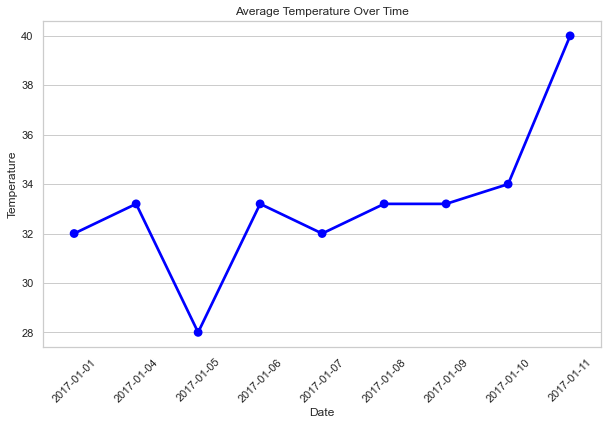

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # הגדרת הסגנון של הגרף

plt.figure(figsize=(10, 6))  # הגדרת גודל הגרף
df.reset_index(inplace=True) # על מנת שהגרף יוכל לקמפל את התוכן לגרף
df['day'] = df['day'].dt.strftime('%Y-%m-%d') # קבלת תאריך אלגנטי 

# הצגת הגרף pointplot
sns.pointplot(data=df, x='day', y='temperature', color='blue')
plt.xlabel('Date')  # הוספת תווית לציר ה-X
plt.ylabel('Temperature')  # הוספת תווית לציר ה-Y
plt.title('Average Temperature Over Time')  # הוספת כותרת לגרף

plt.xticks(rotation=45)  # הטיה של התוויות על ציר ה-X לקריאות יותר

plt.show()  # הצגת הגרף

<a id='section4'></a>

### <font color="navy">.interpolate()</font>

In [43]:
new_df = df.interpolate()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,30.000000,7.00,Sunny
2017-01-05,28.000000,7.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [33]:
new_df = df.interpolate(method="time") 
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,7.00,Sunny
2017-01-05,28.000000,7.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


**Notice that in above temperature on 2017-01-04 is 29 instead of 30 (in plain linear interpolate)**

**There are many other methods for interpolation such as quadratic, piecewise_polynomial, cubic etc. 
Just google "dataframe interpolate" to see complete documentation**

<a id='section5'></a>

### <font color="navy">.dropna()</font>

In [34]:
new_df = df.dropna()
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


#### Condition for drop

In [45]:
new_df = df.dropna(how='all')
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,7.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [49]:
new_df = df.dropna(thresh=1)
new_df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,7.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [ ]:
# הסרה לפי עמודה

In [14]:
df.dropna(subset=['temperature'])

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
2,2017-01-05,28.0,NaN,Snow
4,2017-01-07,32.0,NaN,Rain
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


### <font color="navy">Inserting Missing Dates</font>

##### Please note that our index column is not continuous; we can fill in the missing dates using the following function

In [56]:
dt = pd.date_range("01-01-2017","01-11-2017")
idx = pd.DatetimeIndex(dt)
df.reindex(idx)

,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,7.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


#### Read data about Covid cases in Italy on start stage of pandemic using pandas

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/italy-covid-daywise.csv'
covid_df = pd.read_csv(url)
covid_df.tail()

#### We will focus on date column

In [32]:

covid_df["date"]


0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

#### note that date type is object. let's convert it to pandas datetime
#### for pandas datetime reference and examples: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
#### video tutorial: https://www.youtube.com/watch?v=UFuo7EHI8zc

In [15]:
covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

#### now we can extract the year,month,day and weekday properties (and much more )

In [38]:
cuvidDateTimeObj = pd.DatetimeIndex(covid_df.date)
covid_df['year'] = cuvidDateTimeObj.year
covid_df['month'] = cuvidDateTimeObj.month
covid_df['day'] = cuvidDateTimeObj.day
covid_df['weekday'] = cuvidDateTimeObj.weekday
covid_df


,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


#### By using datetime we can present rows of specific dates, for example only August:

In [39]:
covid_df_august = covid_df[covid_df.month == 8]
covid_df_august.tail()

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
240,2020-08-27,1366.0,13.0,57640.0,2020,8,27,3
241,2020-08-28,1409.0,5.0,65135.0,2020,8,28,4
242,2020-08-29,1460.0,9.0,64294.0,2020,8,29,5
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0


* Focus on 'new_cases', 'new_deaths' and 'new_tests' columns



In [40]:
covid_df_august_metrics = covid_df_august[['new_cases', 'new_deaths', 'new_tests']]




* sum

In [41]:
covid_august_totals = covid_df_august_metrics.sum()
covid_august_totals

new_cases       21060.0
new_deaths        345.0
new_tests     1098704.0
dtype: float64

* mean

In [42]:
covid_df_august_metrics.mean()

new_cases       679.354839
new_deaths       11.129032
new_tests     35442.064516
dtype: float64

* median

In [21]:
covid_df_august_metrics.median()

new_cases       522.0
new_deaths        6.0
new_tests     31905.0
dtype: float64

#### The groupby command can be used to apply function for all monthes

* sum:

In [22]:
covid_month_df_sum = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()
covid_month_df_sum

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [ ]:
# print todays date in pandas:
# import pandas as pd
from datetime import date # get python datetime
print(date.today())

In [ ]:
# self learning:.
# 1. calculate total deaths in May at the above 'italy-covid-daywise.csv' url
# 2. python pandas datetime excercises (with solutions):
# https://www.w3resource.com/python-exercises/pandas/datetime/index.php

# Read tirgul 5 on SeaBorn (not matplotlib)

In [ ]:
# solution 1
import pandas as pd
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/italy-covid-daywise.csv'
covid_df = pd.read_csv(url)
covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month
totalDeathsInMay = covid_df[covid_df.month == 5]['new_deaths'].sum()
print('total deaths in May: ',totalDeathsInMay)